# Hackathon Goal: Asset Health Score
Author: Lavinia Wang<br>
@Showpad

- Segment marketing content by lifetime engagement and recent engagement
    * Create recent engagement report for each marketing-created asset from user activity data export
    * Compare lifetime engagement to recent engagement of marketing-created assets in Showpad library to 
    * Create an “asset health score” for each marketing-created asset in Showpad library from all engagement data  
    * Visualize the health scores with an Experience App

In [1]:
## Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Load file into pandas
## Data starts in row #2
mkt_lib = pd.read_csv("/Users/liyan.wang/Desktop/Hackathon/Sample Showpad Report Exports/library-marketing-content showpad-export-20190709.csv", 
                 header=0)
user_act = pd.read_csv("/Users/liyan.wang/Desktop/Hackathon/Sample Showpad Report Exports/user-activity export.csv", 
                 header=0)
top_mkt = pd.read_csv("/Users/liyan.wang/Desktop/Hackathon/Sample Showpad Report Exports/top-content-marketing.csv", 
                 header=0)

In [3]:
print("library marketing content has shape: ", mkt_lib.shape)
print("user activity has shape: ", user_act.shape)
print("top content marketing has shape: ", top_mkt.shape)

library marketing content has shape:  (878, 13)
user activity has shape:  (4624, 10)
top content marketing has shape:  (472, 19)


In [4]:
mkt_lib.head()

,id,asset name,size,uploaded date,expiry date,tags,used in channels,annotatable,confidential,shareable,(page)views,likes,slug
0,92df4bbb7be2d9f00fbc3d9adc680132,Showpad Overview Video.mp4,1671718.0,2016-06-24 18:52:06,NaN,NaN,"Apple Business Spotlight, FabTech 2016, Medica...",0,0,1,6205,2,7c32180f276ee092563de655b365bec9
1,f715ad04737e6e315d00d0a057f101d4,ROI Calculator Supporting Slides.pdf,900579.0,2015-10-26 20:54:08,NaN,NaN,"(deprovisioned) Show & Share, My Channel, Phil...",1,0,1,339,0,9bf071effa6b23a97727faca7adfa727
2,a2618799d9ddeee1935e466640e640c2,ROI Tool.xlsx,136478.0,2015-10-26 20:54:14,NaN,NaN,"(deprovisioned) Show & Share, Hospitality Co.,...",1,0,1,235,0,e510572d9c0bd2bb532b992851d2b33a
3,3e4d76a178bac836f44c7bf3ff2dfe83,Atlas Copco Testimonial.mov,17157828.0,2015-10-26 21:14:55,NaN,NaN,"2018 NA Events Channel, Minds & More 2016, Arg...",0,0,1,1942,0,2e7f974e097735ff24b59f5f336dcd37
4,14cf833de6732a8d7623ccef57da117a,bioMérieux Testimonial.mov,9453689.0,2016-07-15 18:59:49,NaN,NaN,"MarTech EU 2016, 2018 NA Events Channel, Minds...",0,0,1,826,0,6e6c928c0dcaab0da8d6425e80ec20ed


In [5]:
mkt_lib['uploaded date'] = pd.to_datetime(mkt_lib['uploaded date'])
mkt_lib.describe(include='all')

,id,asset name,size,uploaded date,expiry date,tags,used in channels,annotatable,confidential,shareable,(page)views,likes,slug
count,878,878,8.590000e+02,878,19,88,857,878.000000,878.000000,878.000000,878.000000,878.000000,878
unique,878,865,NaN,842,3,63,494,NaN,NaN,NaN,NaN,NaN,878
top,c4ba2713b047aa0c236ab7b730c30aa6,Why Showpad Video.mp4,NaN,2018-02-22 11:29:19,2019-03-10 23:00:00,Adobe AEM,"SE Channel, SE Channel",NaN,NaN,NaN,NaN,NaN,3fe506b075babc00aa5c5c90b58d9577
freq,1,2,NaN,5,14,5,39,NaN,NaN,NaN,NaN,NaN,1
first,NaN,NaN,NaN,2015-10-26 20:54:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-06-21 23:12:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.684530e+07,NaN,NaN,NaN,NaN,0.576310,0.002278,0.970387,573.542141,0.156036,NaN
std,NaN,NaN,9.764371e+07,NaN,NaN,NaN,NaN,0.494424,0.047700,0.169613,1755.217202,0.582550,NaN
min,NaN,NaN,1.284000e+03,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,1.645305e+05,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,15.000000,0.000000,NaN


In [6]:
user_act.head(10)

,Activity Type,Date,Sender Name,Sender Email,Title,Recipient Name,Recipient Email,File Name,Number of File Views,Number of File Downloads
0,catalog,2019-07-08T15:22:44-07:00,Justine Cavan,justine.cavan@showpad.com,Gartner 2018 DCMS market guide,emilie.kraft@morningstar.com,emilie.kraft@morningstar.com,Gartner- Digital Content Management for Sales ...,2.0,1.0
1,catalog,2019-07-08T15:11:15-07:00,Justine Cavan,justine.cavan@showpad.com,Forrester Wave for SEA 2018,emilie.kraft@morningstar.com,emilie.kraft@morningstar.com,Forrester Wave Report Q3FY18.pdf,5.0,1.0
2,catalog,2019-07-08T14:15:36-07:00,Trevah Di Salvio,trevah.disalvio@showpad.com,LearnCore Account Migration to Showpad Coach -...,"""Botadra, Dharam""",dharam.botadra@abbott.com,Showpad Coach For LearnCore Admins One Pager.pdf,0.0,0.0
3,catalog,2019-07-08T14:15:36-07:00,Trevah Di Salvio,trevah.disalvio@showpad.com,LearnCore Account Migration to Showpad Coach -...,"""Ortiz, Jennifer",jennifer.ortiz@abbott.com,Showpad Coach For LearnCore Admins One Pager.pdf,0.0,0.0
4,catalog,2019-07-08T14:15:36-07:00,Trevah Di Salvio,trevah.disalvio@showpad.com,LearnCore Account Migration to Showpad Coach -...,"""Castillo, Cristian",cristian.castillocamacho@abbott.com,Showpad Coach For LearnCore Admins One Pager.pdf,0.0,0.0
5,catalog,2019-07-08T14:15:36-07:00,Trevah Di Salvio,trevah.disalvio@showpad.com,LearnCore Account Migration to Showpad Coach -...,Robert Black,robert.black@showpad.com,Showpad Coach For LearnCore Admins One Pager.pdf,0.0,0.0
6,catalog,2019-07-08T14:13:00-07:00,Dan Langfield,daniel.langfield@showpad.com,Re: Are you sure?,"""Osmers, Mark""",OsmersM@autonation.com,Cox Automotive Case Study.pdf,0.0,0.0
7,catalog,2019-07-08T14:04:00-07:00,Charles West,charles.west@showpad.com,No subject,NaN,NaN,NaN,NaN,NaN
8,catalog,2019-07-08T13:31:06-07:00,Dustin Levi,dustin.levi@showpad.com,sss,NaN,NaN,NaN,NaN,NaN
9,catalog,2019-07-08T13:23:20-07:00,Connor Love,connor.love@showpad.com,Newport,NaN,NaN,NaN,NaN,NaN


In [7]:
user_act.describe(include="all")

,Activity Type,Date,Sender Name,Sender Email,Title,Recipient Name,Recipient Email,File Name,Number of File Views,Number of File Downloads
count,4624,4624,4624,4624,4614,4049,2601,3921,3921.000000,3921.000000
unique,2,1541,152,152,1103,1081,1007,655,NaN,NaN
top,catalog,2019-07-08T00:26:54-07:00,Sarah Setlak,sarah.setlak@showpad.com,No subject,Chrome on Mac 1,daniela.kohler@sandvik.com,Showpad Platform One Pager.pdf,NaN,NaN
freq,4496,90,180,180,304,410,129,269,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.384086,0.342005
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.656068,1.829072
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000


In [8]:
user_act.columns

Index(['Activity Type', 'Date', 'Sender Name', 'Sender Email', 'Title',
       'Recipient Name', 'Recipient Email', 'File Name',
       'Number of File Views', 'Number of File Downloads'],
      dtype='object')

In [9]:
## Remove rows that file name is NaN
user_act_copy = user_act.dropna(subset = ['File Name'])
user_act_copy.Date = pd.to_datetime(user_act_copy['Date'])
user_act_copy.shape

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(3921, 10)

In [10]:
top_mkt.head()

,Id,Display name,Type,Source,Division Name,Owner id,Owner name,Deleted Asset,Edited Asset,In-app number of views,In-app avg daily view duration (secs),In-app viewers,In-app avg view duration (secs),Recipient number of views,Recipient avg daily view duration (secs),Recipient viewers,Recipient avg view duration (secs),Shares,Social shares
0,c2f68c76b98f5b79405b530fed21b109,Showpad Sales Enablement Platform Overview.pdf,document,Marketing,*Global Sales Enablement,NaN,NaN,False,False,1272,3362.0,87,66.0,360,854.0,63,57.0,116,1
1,4f8b6c928b7014e898719b42e756647d,Showpad Content Overview Deck.pptx,document,Marketing,*Global Sales Enablement,NaN,NaN,False,False,223,429.0,37,37.0,246,649.0,25,40.0,49,7
2,3eec7d598b5d6c64fc0e9d026b12be4d,Showpad Coach Overview deck.pdf,document,Marketing,*Global Sales Enablement,NaN,NaN,False,False,184,582.0,38,70.0,74,533.0,21,108.0,33,1
3,03ab719f50952dfaa2eb76ae03e0844c,Showpad Platform One Pager.pdf,document,Marketing,*Global Sales Enablement,NaN,NaN,False,False,163,185.0,59,25.0,195,721.0,80,85.0,264,38
4,b7eea6fc9e95429f25f18767b3b3dbdc,Salesforce Integration Overview Deck.pdf,document,Marketing,*Global Sales Enablement,NaN,NaN,False,False,80,253.0,20,51.0,196,981.0,21,65.0,19,2


In [11]:
top_mkt.describe(include='all')

,Id,Display name,Type,Source,Division Name,Owner id,Owner name,Deleted Asset,Edited Asset,In-app number of views,In-app avg daily view duration (secs),In-app viewers,In-app avg view duration (secs),Recipient number of views,Recipient avg daily view duration (secs),Recipient viewers,Recipient avg view duration (secs),Shares,Social shares
count,472,472,472,472,472,0.0,0.0,472,472,472.000000,456.000000,472.000000,456.00000,472.000000,456.000000,472.000000,456.000000,472.000000,472.000000
unique,472,471,6,1,2,NaN,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2ba3af9d5a386a2056ea4b203b4cd2ab,Showpad Success Stories.url,document,Marketing,*Global Sales Enablement,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2,312,472,431,NaN,NaN,471,472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.502119,86.120614,5.654661,34.75000,8.724576,142.467105,2.442797,35.111842,5.398305,1.233051
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.740055,215.892028,7.683869,61.75687,29.175732,582.973800,7.771205,111.747530,19.931471,4.724325
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,14.000000,1.000000,10.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,39.000000,3.000000,20.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,82.250000,7.000000,36.00000,5.000000,59.500000,2.000000,22.000000,4.000000,1.000000


## Variable Exploration 

In [12]:
## Function that takes dataframe group by each categorical column/variable
## Output a table shows grouping numbers by different levels and a bar chart to visualize

def exploration(data, variable):
    lst = data.groupby(by=variable).count()
    lst = lst['id']
    print(lst)
    lst.plot.bar()  

likes
0    784
1     73
2     12
3      3
4      3
5      1
7      2
Name: id, dtype: int64


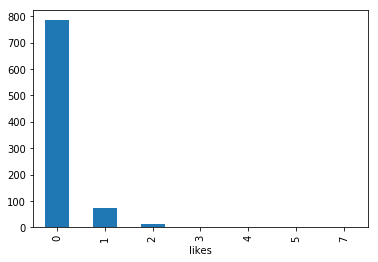

In [13]:
c_like = exploration(mkt_lib,'likes')

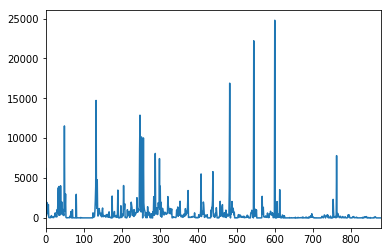

In [14]:
c_page_views = mkt_lib['(page)views'].plot.line()

## Transformation

- <b> user activity export</b>

In [15]:
user_act_file = pd.DataFrame(user_act_copy.groupby(by='File Name').agg('sum'))

print("shape of user activity(group by file name) is: ", user_act_file.shape)
user_act_file.head()

shape of user activity(group by file name) is:  (655, 2)


,Number of File Views,Number of File Downloads
File Name,,
1 Minute Testimonial.mp4,0.0,0.0
1. EF presentation Utrecht event.pdf,0.0,1.0
10 Users.pdf,14.0,0.0
20 Users.pdf,2.0,0.0
2019 Personas Overview - Personas.pdf,0.0,1.0


In [16]:
date_last_activity = user_act_copy[['File Name','Date']].drop_duplicates().groupby(by='File Name').max()

print("shape of last activity date is: ", date_last_activity.shape)
date_last_activity.head()

shape of last activity date is:  (655, 1)


,Date
File Name,
1 Minute Testimonial.mp4,2019-06-19 06:26:17-07:00
1. EF presentation Utrecht event.pdf,2019-06-25 06:19:34-07:00
10 Users.pdf,2019-06-17 15:37:22-07:00
20 Users.pdf,2019-06-17 15:37:22-07:00
2019 Personas Overview - Personas.pdf,2019-06-25 06:19:34-07:00


In [17]:
recent_engagement = pd.concat([user_act_file, date_last_activity], axis=1)
recent_engagement.head()

,Number of File Views,Number of File Downloads,Date
File Name,,,
1 Minute Testimonial.mp4,0.0,0.0,2019-06-19 06:26:17-07:00
1. EF presentation Utrecht event.pdf,0.0,1.0,2019-06-25 06:19:34-07:00
10 Users.pdf,14.0,0.0,2019-06-17 15:37:22-07:00
20 Users.pdf,2.0,0.0,2019-06-17 15:37:22-07:00
2019 Personas Overview - Personas.pdf,0.0,1.0,2019-06-25 06:19:34-07:00


- <b> library marketing content export</b>

In [18]:
mkt_lib_file = pd.DataFrame(mkt_lib.groupby(by='asset name').sum())

print("shape of marketing library content(group by asset name) is: ", mkt_lib_file.shape)
mkt_lib_file.head()

shape of marketing library content(group by asset name) is:  (865, 6)


,size,annotatable,confidential,shareable,(page)views,likes
asset name,,,,,,
*Risk Exposure Calculator in $*.zip,9177597.0,0,0,1,5,0
1 Minute Testimonial.mp4,3846739.0,0,0,1,890,0
"2. Find, Present, Share Content.mov",452135348.0,0,0,1,3,0
2016 CSO Insight Report - Summary.pdf,1400333.0,1,0,1,969,1
2016 State of Sales Enablement Infographic.pdf,314100.0,1,0,1,420,1


In [19]:
mkt_lib_file_copy = mkt_lib_file[['(page)views', 'likes']]
#mkt_lib_file_copy

In [20]:
date_created = mkt_lib[['asset name','uploaded date']].drop_duplicates().groupby(by='asset name').max()
print("shape of created date is: ", date_created.shape)
date_created.head()

shape of created date is:  (865, 1)


,uploaded date
asset name,
*Risk Exposure Calculator in $*.zip,2019-04-17 02:52:34
1 Minute Testimonial.mp4,2015-10-27 12:42:54
"2. Find, Present, Share Content.mov",2018-03-15 17:56:29
2016 CSO Insight Report - Summary.pdf,2016-08-03 21:41:20
2016 State of Sales Enablement Infographic.pdf,2016-09-13 18:49:06


In [21]:
lifetime_engagement = pd.concat([mkt_lib_file_copy, date_created], axis=1)
lifetime_engagement.head()

,(page)views,likes,uploaded date
asset name,,,
*Risk Exposure Calculator in $*.zip,5,0,2019-04-17 02:52:34
1 Minute Testimonial.mp4,890,0,2015-10-27 12:42:54
"2. Find, Present, Share Content.mov",3,0,2018-03-15 17:56:29
2016 CSO Insight Report - Summary.pdf,969,1,2016-08-03 21:41:20
2016 State of Sales Enablement Infographic.pdf,420,1,2016-09-13 18:49:06


- <b> top content marketing export </b>

In [22]:
top_mkt_file = pd.DataFrame(top_mkt.groupby(by='Display name').sum())

print("shape of top marketing content(group by asset name) is: ", top_mkt_file.shape)
top_mkt_file.head()

shape of top marketing content(group by asset name) is:  (471, 14)


,Owner id,Owner name,Deleted Asset,Edited Asset,In-app number of views,In-app avg daily view duration (secs),In-app viewers,In-app avg view duration (secs),Recipient number of views,Recipient avg daily view duration (secs),Recipient viewers,Recipient avg view duration (secs),Shares,Social shares
Display name,,,,,,,,,,,,,,
1 Minute Testimonial.mp4,0.0,0.0,False,False,2,31.0,2,31.0,0,0.0,0,0.0,1,1
2019.03.OP.PS.Advanced Impact.pdf,0.0,0.0,False,False,0,0.0,0,0.0,6,546.0,1,91.0,0,0
2019.03.OP.PS.Guided Self Service.pdf,0.0,0.0,False,False,1,14.0,1,14.0,0,0.0,0,0.0,0,0
2019.05.OP.PS.Guided Self Onboarding.pdf,0.0,0.0,False,False,34,42.0,11,12.0,35,402.0,8,92.0,12,0
2019.05.OP.PS.Quick Start.Coach.pdf,0.0,0.0,False,False,22,74.0,11,37.0,29,76.0,6,13.0,15,0


In [23]:
top_mkt_copy = top_mkt_file[['Shares', 'Social shares']]
top_mkt_copy.head()

,Shares,Social shares
Display name,,
1 Minute Testimonial.mp4,1,1
2019.03.OP.PS.Advanced Impact.pdf,0,0
2019.03.OP.PS.Guided Self Service.pdf,0,0
2019.05.OP.PS.Guided Self Onboarding.pdf,12,0
2019.05.OP.PS.Quick Start.Coach.pdf,15,0


- <b> combine three asset files </b>

In [24]:
combined = pd.concat([recent_engagement, lifetime_engagement, top_mkt_copy], axis=1)
combined = combined.reset_index()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [25]:
combined.head()

,index,Number of File Views,Number of File Downloads,Date,(page)views,likes,uploaded date,Shares,Social shares
0,*Risk Exposure Calculator in $*.zip,NaN,NaN,NaN,5.0,0.0,2019-04-17 02:52:34,NaN,NaN
1,1 Minute Testimonial.mp4,0.0,0.0,2019-06-19 06:26:17-07:00,890.0,0.0,2015-10-27 12:42:54,1.0,1.0
2,1. EF presentation Utrecht event.pdf,0.0,1.0,2019-06-25 06:19:34-07:00,NaN,NaN,NaT,NaN,NaN
3,10 Users.pdf,14.0,0.0,2019-06-17 15:37:22-07:00,NaN,NaN,NaT,NaN,NaN
4,"2. Find, Present, Share Content.mov",NaN,NaN,NaN,3.0,0.0,2018-03-15 17:56:29,NaN,NaN


- <b> parse file type out of asset name </b>

In [26]:
asset = pd.Series(np.array(combined['index']))
asset = asset.str.split(pat=".")

In [27]:
## Extract the last string of content name for asset
file_type = [asset[i][-1] for i in range(len(asset))]
combined['file_type'] = file_type

In [28]:
combined = combined.rename(index=str, columns={"index": "asset_name", "uploaded date": "date_created", 
                                               "Date": "date_last_activity"})
## Change order of columns
combined = combined[['asset_name', 'file_type', 'date_created', 'date_last_activity', 'Number of File Views', 
                     'Number of File Downloads', '(page)views','likes', 'Shares', 'Social shares']]

## Change name of columns
combined.columns = ['asset_name', 'file_type', 'date_created', 'date_last_activity', 'views_recent', 'downloads_recent', 
                    'views_lifetime', 'likes_lifetime', 'shares', 'social_shares']

In [29]:
combined.head()

,asset_name,file_type,date_created,date_last_activity,views_recent,downloads_recent,views_lifetime,likes_lifetime,shares,social_shares
0,*Risk Exposure Calculator in $*.zip,zip,2019-04-17 02:52:34,NaN,NaN,NaN,5.0,0.0,NaN,NaN
1,1 Minute Testimonial.mp4,mp4,2015-10-27 12:42:54,2019-06-19 06:26:17-07:00,0.0,0.0,890.0,0.0,1.0,1.0
2,1. EF presentation Utrecht event.pdf,pdf,NaT,2019-06-25 06:19:34-07:00,0.0,1.0,NaN,NaN,NaN,NaN
3,10 Users.pdf,pdf,NaT,2019-06-17 15:37:22-07:00,14.0,0.0,NaN,NaN,NaN,NaN
4,"2. Find, Present, Share Content.mov",mov,2018-03-15 17:56:29,NaN,NaN,NaN,3.0,0.0,NaN,NaN


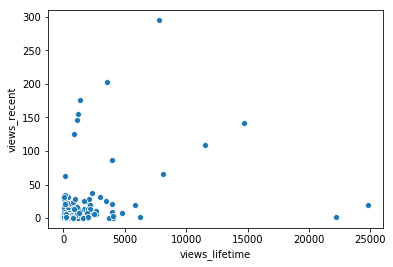

In [30]:
view_vs = sns.scatterplot(x='views_lifetime', y='views_recent', data=combined)

- <b> create boolean variable indicating data scource</b>

In [31]:
def create_boolean(data, variable):
    boo = data[variable]
    for i in range (len(boo)):
        if pd.isnull(boo[i]):
            boo[i] = '0'
        else:
            boo[i] = '1'
    return boo       

In [32]:
three_measures = combined[['views_recent','views_lifetime', 'shares']]

from_usr_act = create_boolean(three_measures, 'views_recent')
from_mkt_lib = create_boolean(three_measures, 'views_lifetime')
from_top_mkt = create_boolean(three_measures, 'shares')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [64]:
measures = pd.concat([from_usr_act, from_mkt_lib, from_top_mkt], axis=1).astype(int)
measures = measures.rename(index=str, columns={"views_recent": "from_usr_act", "views_lifetime": "from_mkt_lib", 
                                               "shares": "from_top_mkt"})
measures.head()

,from_usr_act,from_mkt_lib,from_top_mkt
0,0,1,0
1,1,1,1
2,1,0,0
3,1,0,0
4,0,1,0


In [34]:
measurement = np.array(measures)
source = []
for i in range (len(measurement)):
    list = []
    for j in range (3):
        if measurement[i][j] == 1:
            list.append(j)
    source.append(list)
#source

In [35]:
data_source = source
for i in range (len(data_source)):
    for j in range(len(data_source[i])):
        if data_source[i][j] == 0:
            data_source[i][j] = 'user activity'
        elif data_source[i][j] == 1:
            data_source[i][j] = 'library marketing'
        elif data_source[i][j] == 2:
            data_source[i][j] = 'top marketing'
#data_source

- <b>Compute 3 quantile of each measurement and assign score

In [36]:
## Remove NaN temporarily for computing quantile
tmp = combined[['views_recent', 'views_lifetime', 'shares']].dropna()
#tmp

tmp.describe()

,views_recent,views_lifetime,shares
count,219.000000,219.000000,219.000000
mean,13.191781,1215.611872,11.378995
std,34.117844,2749.211577,28.116039
min,0.000000,0.000000,0.000000
25%,0.000000,160.000000,2.000000
50%,3.000000,487.000000,4.000000
75%,11.000000,1136.000000,11.000000
max,295.000000,24783.000000,264.000000


- <b> impute missing values with 0</b>

In [37]:
def impute_missing(data, variable):
    value = data[variable]
    for i in range (len(value)):
        if pd.isnull(value[i]):
            value[i] = '0'
    return value

In [38]:
three_impute = combined[['views_recent','views_lifetime', 'shares']]

views_recent_impute = impute_missing(three_impute, 'views_recent')
views_lifetime_impute = impute_missing(three_impute, 'views_lifetime')
shares_impute = impute_missing(three_impute, 'shares')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Get quantile of three measurements from tmp
```
recent_view 
Categories (3, interval[float64]): [(-0.001, 1.0] < (1.0, 6.333] < (6.333, 295.0]]

lifetime_view
Categories (3, interval[float64]): [(-0.001, 211.0] < (211.0, 868.0] < (868.0, 24783.0]]

shares_mkt_content
Categories (3, interval[float64]): [(-0.001, 2.0] < (2.0, 7.0] < (7.0, 264.0]]
```

In [39]:
## Function that converts the grouping results into score
def score_convert(data, level_1, level_2):
    val = data
    for i in range (len(val)):
        if val[i] <= level_1:
            val[i] = '1'
        elif level_1 < val[i] <= level_2:
            val[i] = '2'
        else:
            val[i] = '3'
    return val

In [40]:
recent_view_score = score_convert(views_recent_impute, 1.0, 6.333)
lifetime_view_score = score_convert(views_lifetime_impute, 211.0, 868.0)
share_score = score_convert(shares_impute, 2.0, 7.0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
score = pd.concat([recent_view_score, lifetime_view_score, share_score], axis=1).astype(float)

In [42]:
score.head(5)

,views_recent,views_lifetime,shares
0,1.0,1.0,1.0
1,1.0,3.0,1.0
2,1.0,1.0,1.0
3,3.0,1.0,1.0
4,1.0,1.0,1.0


In [43]:
## total = 1/3(recent_view) + 1/3(lifetime_view) + 1/3(shares)
s = np.array(score)
n = 0
for i in range (len(s)):
    for j in range (3):
        n += s[i][j]
    s[i] = n * 1/3
    n = 0

total = [s[i][0] for i in range(len(s))]

- <b> merge combined with boolean source, string source and total score </b>

In [65]:
combined_boolean = pd.concat([combined, measures], axis=1)

In [66]:
combined_boolean

,asset_name,file_type,date_created,date_last_activity,views_recent,downloads_recent,views_lifetime,likes_lifetime,shares,social_shares,from_usr_act,from_mkt_lib,from_top_mkt
0,*Risk Exposure Calculator in $*.zip,zip,2019-04-17 02:52:34,NaN,NaN,NaN,5.0,0.0,NaN,NaN,0,1,0
1,1 Minute Testimonial.mp4,mp4,2015-10-27 12:42:54,2019-06-19 06:26:17-07:00,0.0,0.0,890.0,0.0,1.0,1.0,1,1,1
2,1. EF presentation Utrecht event.pdf,pdf,NaT,2019-06-25 06:19:34-07:00,0.0,1.0,NaN,NaN,NaN,NaN,1,0,0
3,10 Users.pdf,pdf,NaT,2019-06-17 15:37:22-07:00,14.0,0.0,NaN,NaN,NaN,NaN,1,0,0
4,"2. Find, Present, Share Content.mov",mov,2018-03-15 17:56:29,NaN,NaN,NaN,3.0,0.0,NaN,NaN,0,1,0
5,20 Users.pdf,pdf,NaT,2019-06-17 15:37:22-07:00,2.0,0.0,NaN,NaN,NaN,NaN,1,0,0
6,2016 CSO Insight Report - Summary.pdf,pdf,2016-08-03 21:41:20,NaN,NaN,NaN,969.0,1.0,NaN,NaN,0,1,0
7,2016 State of Sales Enablement Infographic.pdf,pdf,2016-09-13 18:49:06,NaN,NaN,NaN,420.0,1.0,NaN,NaN,0,1,0
8,2016_Sales_Enablement_Optimization_Study_-_Sho...,pdf,2016-07-29 22:29:37,NaN,NaN,NaN,396.0,0.0,NaN,NaN,0,1,0
9,2019 Personas Overview - Personas.pdf,pdf,NaT,2019-06-25 06:19:34-07:00,0.0,1.0,NaN,NaN,NaN,NaN,1,0,0


In [67]:
new_combined = combined_boolean
new_combined['data_source'] = data_source
new_combined['total_score'] = total
new_combined.head()

,asset_name,file_type,date_created,date_last_activity,views_recent,downloads_recent,views_lifetime,likes_lifetime,shares,social_shares,from_usr_act,from_mkt_lib,from_top_mkt,data_source,total_score
0,*Risk Exposure Calculator in $*.zip,zip,2019-04-17 02:52:34,NaN,NaN,NaN,5.0,0.0,NaN,NaN,0,1,0,[library marketing],1.000000
1,1 Minute Testimonial.mp4,mp4,2015-10-27 12:42:54,2019-06-19 06:26:17-07:00,0.0,0.0,890.0,0.0,1.0,1.0,1,1,1,"[user activity, library marketing, top markeitng]",1.666667
2,1. EF presentation Utrecht event.pdf,pdf,NaT,2019-06-25 06:19:34-07:00,0.0,1.0,NaN,NaN,NaN,NaN,1,0,0,[user activity],1.000000
3,10 Users.pdf,pdf,NaT,2019-06-17 15:37:22-07:00,14.0,0.0,NaN,NaN,NaN,NaN,1,0,0,[user activity],1.666667
4,"2. Find, Present, Share Content.mov",mov,2018-03-15 17:56:29,NaN,NaN,NaN,3.0,0.0,NaN,NaN,0,1,0,[library marketing],1.000000


- <b> export merged table and recent engagement report</b>

In [47]:
user_act_file.to_csv('Recent_Engagement_Report.csv')
new_combined.to_csv('Merged_Engagement_Table.csv', index=False)

## Extra

- <b>Try k-means clustering on complete data</b>

In [68]:
complete_data = new_combined[['asset_name', 'views_recent', 'downloads_recent', 'views_lifetime', 'likes_lifetime',
                                        'shares', 'social_shares', 'total_score']].dropna()
complete_data

,asset_name,views_recent,downloads_recent,views_lifetime,likes_lifetime,shares,social_shares,total_score
1,1 Minute Testimonial.mp4,0.0,0.0,890.0,0.0,1.0,1.0,1.666667
17,2019.05.OP.PS.Guided Self Onboarding.pdf,35.0,3.0,73.0,0.0,12.0,0.0,2.333333
18,2019.05.OP.PS.Quick Start.Coach.pdf,29.0,1.0,21.0,0.0,15.0,0.0,2.333333
19,2019.05.OP.PS.Quick Start.Content.pdf,17.0,4.0,166.0,0.0,16.0,0.0,2.333333
20,2019.05.OP.PS.Quick Start.Platform.pdf,17.0,0.0,19.0,0.0,7.0,0.0,2.000000
22,20sec testimonial compilation.mp4,11.0,0.0,125.0,0.0,8.0,0.0,2.333333
29,3D & AR for Manufacturing One Pager.pdf,11.0,0.0,415.0,1.0,5.0,3.0,2.333333
30,3D & Augmented Reality One Pager.pdf,6.0,0.0,525.0,0.0,3.0,4.0,2.000000
31,3D & Augmented Reality Overview Deck.pdf,0.0,0.0,535.0,0.0,5.0,2.0,1.666667
32,3D & Augmented Reality Value Video.mp4,1.0,0.0,477.0,0.0,2.0,7.0,1.333333


In [69]:
clustering_data = np.array(complete_data[complete_data.columns[1:]])
#clustering_data

In [70]:
clustering_data

array([[0.00000000e+00, 0.00000000e+00, 8.90000000e+02, ...,
        1.00000000e+00, 1.00000000e+00, 1.66666667e+00],
       [3.50000000e+01, 3.00000000e+00, 7.30000000e+01, ...,
        1.20000000e+01, 0.00000000e+00, 2.33333333e+00],
       [2.90000000e+01, 1.00000000e+00, 2.10000000e+01, ...,
        1.50000000e+01, 0.00000000e+00, 2.33333333e+00],
       ...,
       [6.00000000e+00, 1.00000000e+00, 2.53500000e+03, ...,
        1.10000000e+01, 2.00000000e+00, 2.66666667e+00],
       [0.00000000e+00, 1.00000000e+00, 8.26000000e+02, ...,
        2.00000000e+00, 0.00000000e+00, 1.33333333e+00],
       [1.00000000e+00, 0.00000000e+00, 1.88000000e+02, ...,
        9.00000000e+00, 0.00000000e+00, 1.66666667e+00]])

In [71]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, max_iter=500, verbose=1) # initialization
kmeans.fit(clustering_data)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 66800361.1900655
start iteration
done sorting
end inner loop
Iteration 1, inertia 63985260.36468876
start iteration
done sorting
end inner loop
Iteration 2, inertia 63755079.35184814
start iteration
done sorting
end inner loop
Iteration 3, inertia 63653710.52269
start iteration
done sorting
end inner loop
Iteration 4, inertia 63653710.52269
center shift 0.000000e+00 within tolerance 1.075106e+02
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 80307457.16028328
start iteration
done sorting
end inner loop
Iteration 1, inertia 68137084.67836258
start iteration
done sorting
end inner loop
Iteration 2, inertia 66771352.71701214
start iteration
done sorting
end inner loop
Iteration 3, inertia 66101340.32324514
start iteration
done sorting
end inner loop
Iteration 4, inertia 66101340.32324514
center shift 0.000000e+00 within tolerance 1.075106e+02
Initialization co

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [72]:
clusters = kmeans.predict(clustering_data)
print (clusters)

[0 0 0 0 0 0 0 0 0 0 4 0 0 0 4 0 4 0 4 4 0 0 0 4 0 0 4 0 0 4 0 0 4 0 4 0 4
 0 0 4 0 0 4 0 0 0 4 0 0 0 0 0 0 4 0 0 0 0 0 4 4 0 0 0 2 0 0 0 0 0 0 0 0 0
 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 4 0 2 0
 0 0 0 0 4 0 0 0 0 4 4 0 0 0 0 0 2 0 4 0 0 2 1 4 0 0 0 0 0 0 0 0 4 4 2 0 0
 0 0 0 4 4 1 2 0 4 4 0 4 2 4 3 2 3 0 4 0 4 2 2 0 2 0 0 4 0 4 4 0 0 0 0 4 4
 4 0 4 4 2 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 4 0 0 0 4 0 4 0 0]


In [73]:
new_complete = complete_data
new_complete['cluster'] = clusters
new_complete

,asset_name,views_recent,downloads_recent,views_lifetime,likes_lifetime,shares,social_shares,total_score,cluster
1,1 Minute Testimonial.mp4,0.0,0.0,890.0,0.0,1.0,1.0,1.666667,0
17,2019.05.OP.PS.Guided Self Onboarding.pdf,35.0,3.0,73.0,0.0,12.0,0.0,2.333333,0
18,2019.05.OP.PS.Quick Start.Coach.pdf,29.0,1.0,21.0,0.0,15.0,0.0,2.333333,0
19,2019.05.OP.PS.Quick Start.Content.pdf,17.0,4.0,166.0,0.0,16.0,0.0,2.333333,0
20,2019.05.OP.PS.Quick Start.Platform.pdf,17.0,0.0,19.0,0.0,7.0,0.0,2.000000,0
22,20sec testimonial compilation.mp4,11.0,0.0,125.0,0.0,8.0,0.0,2.333333,0
29,3D & AR for Manufacturing One Pager.pdf,11.0,0.0,415.0,1.0,5.0,3.0,2.333333,0
30,3D & Augmented Reality One Pager.pdf,6.0,0.0,525.0,0.0,3.0,4.0,2.000000,0
31,3D & Augmented Reality Overview Deck.pdf,0.0,0.0,535.0,0.0,5.0,2.0,1.666667,0
32,3D & Augmented Reality Value Video.mp4,1.0,0.0,477.0,0.0,2.0,7.0,1.333333,0


- <b> create visualizations based on clustering </b>

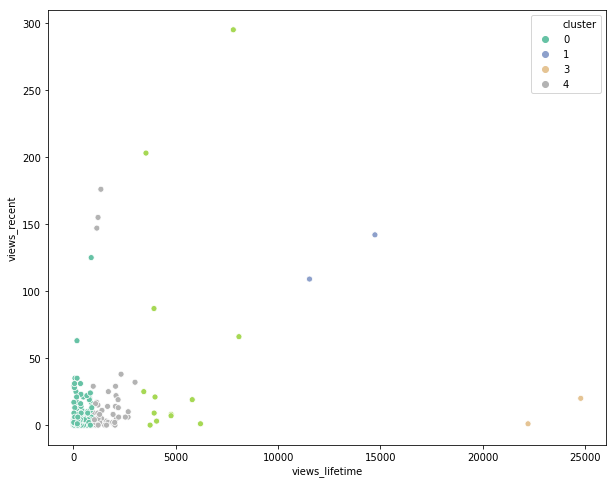

In [103]:
plt.figure(figsize = (10, 8))
g = sns.scatterplot(x='views_lifetime', y='views_recent', hue='cluster', palette='Set2', data=new_complete)
plt.show()

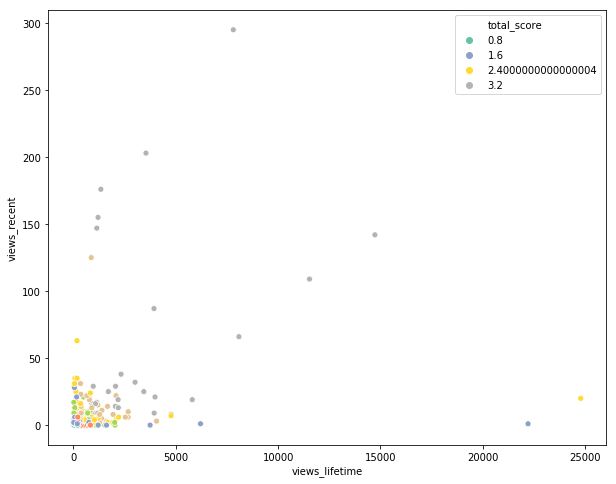

In [104]:
plt.figure(figsize = (10, 8))
g = sns.scatterplot(x='views_lifetime', y='views_recent', hue='total_score', palette='Set2', data=new_complete)
plt.show()

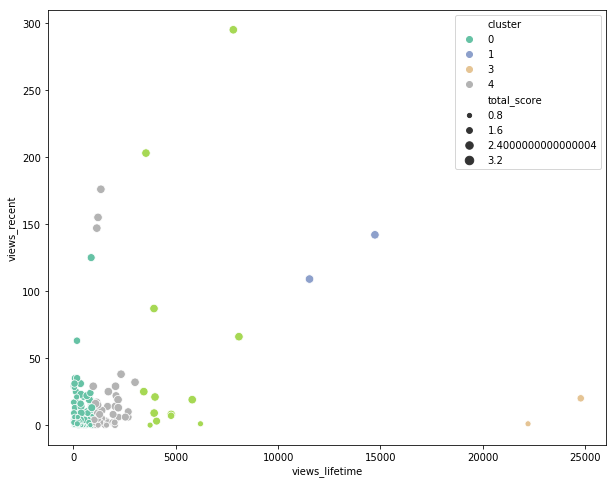

In [108]:
plt.figure(figsize = (10, 8))
g = sns.scatterplot(x='views_lifetime', y='views_recent', hue='cluster', size='total_score', palette='Set2', 
                    data=new_complete)
plt.show()

In [109]:
new_complete.to_csv("Complete_assets_with_cluster.csv", index=False)